In [1]:
# K-평균
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-26 06:36:03--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-26 06:36:03--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-26 06:36:04--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
#KMeans 클래스
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [4]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [5]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

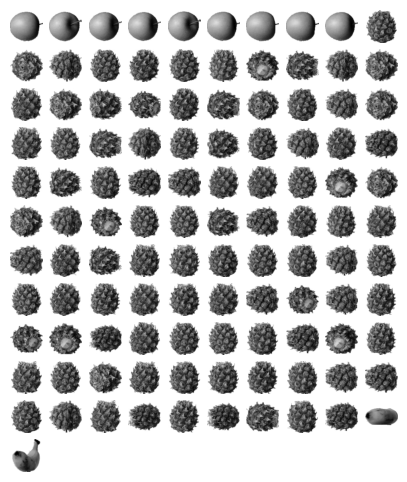

In [7]:
draw_fruits(fruits[km.labels_==0], ratio=0.5)

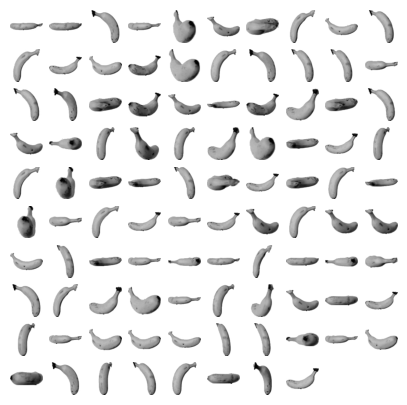

In [8]:
draw_fruits(fruits[km.labels_==1], ratio=0.5)

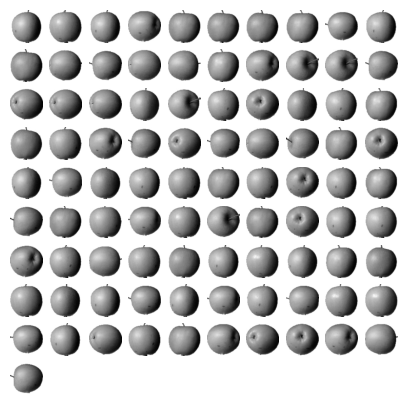

In [9]:
draw_fruits(fruits[km.labels_==2], ratio=0.5)

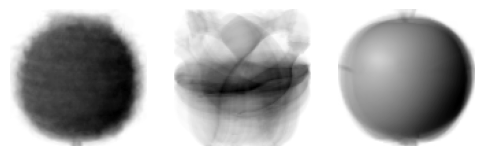

In [10]:
#클러스터 중심
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=2)

In [11]:
#K-평균 모델의 예측
# 입력 데이터와 각 클러스터 중심과의 거리를 변환
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [12]:
# 입력 데이터와 가장 가까운 클러스터 중심의 테이블을 예측 클래스로 반환
print(km.predict(fruits_2d[100:101]))

[0]


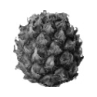

In [13]:
draw_fruits(fruits[100:101])

In [14]:
# 반복된 횟수
print(km.n_iter_)

4


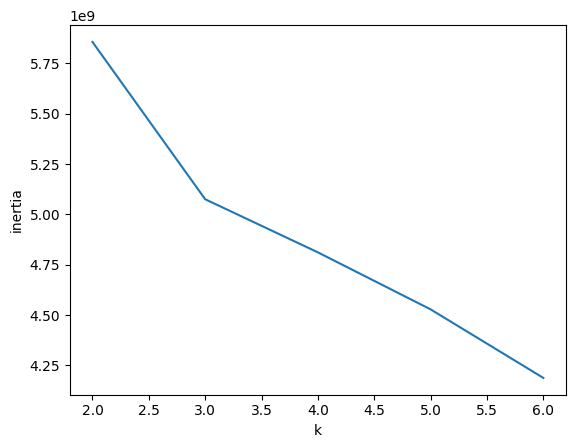

In [15]:
# 최적의 클러스터 개수 찾기
#k-평균 모델은 클러스터 개수를 사전에 지정해야한다는 단점이 있다
# 엘보우 방법
# 적절한 클러스터 개수를 찾는 방법
# 이너셔(클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱의 합으로 정의)
# 클러스터 개수 늘면 클러스터 개개의 크기가 줄기 때문에 이너셔도 줄어듬
# 이너셔 감소하는 속도가 급격하게 낮아지는 저점부터는 클러스터 개수 늘려도
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [16]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(fruits_2d)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3], dtype=int32), array([ 90,  35, 111,  64]))


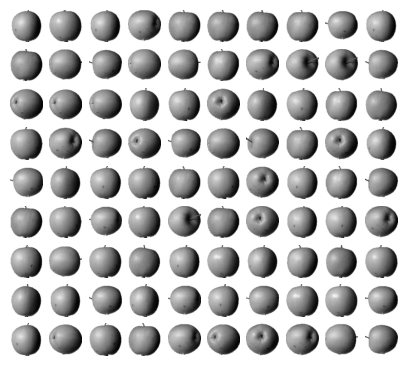

In [17]:
draw_fruits(fruits[km.labels_==0], ratio=0.5)

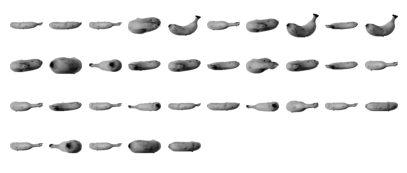

In [18]:
draw_fruits(fruits[km.labels_==1], ratio=0.5)

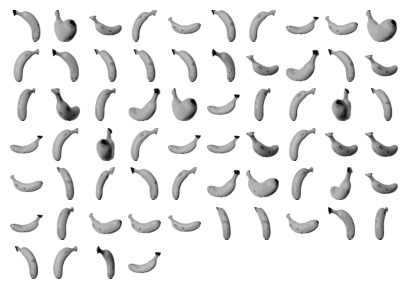

In [19]:
draw_fruits(fruits[km.labels_==3], ratio=0.5)

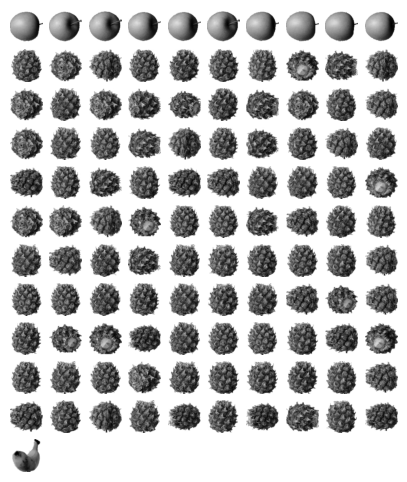

In [20]:
draw_fruits(fruits[km.labels_==2], ratio=0.5)

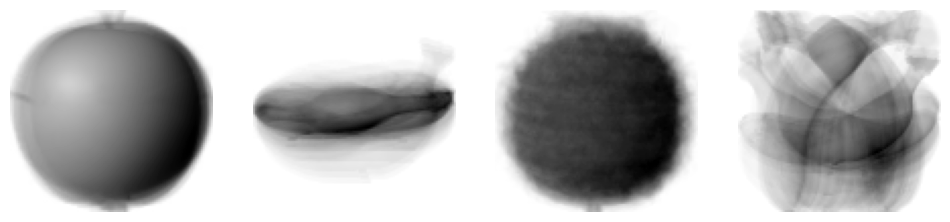

In [21]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4], dtype=int32), array([ 19, 110,  91,  64,  16]))


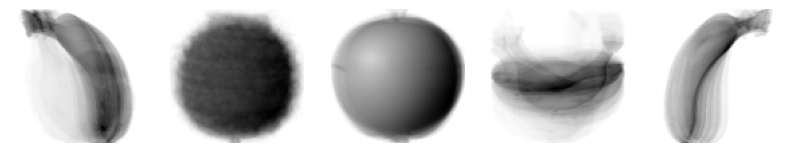

In [22]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(fruits_2d)
print(np.unique(km.labels_, return_counts=True))
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4, 5], dtype=int32), array([110,  32,  91,  16,  35,  16]))


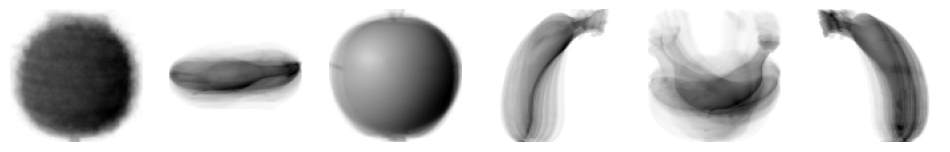

In [23]:
km = KMeans(n_clusters=6, random_state=42)
km.fit(fruits_2d)
print(np.unique(km.labels_, return_counts=True))
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([34, 54, 48, 41, 57, 16, 50]))


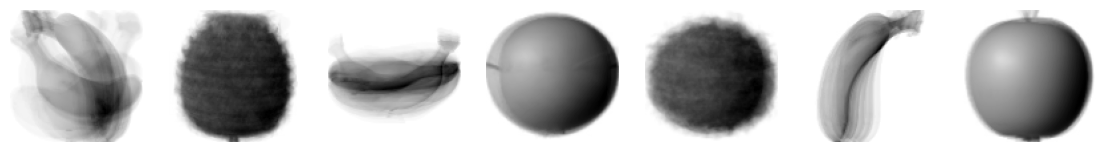

In [24]:
km = KMeans(n_clusters=7, random_state=42)
km.fit(fruits_2d)
print(np.unique(km.labels_, return_counts=True))
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=2)